<a href="https://colab.research.google.com/github/Ruqyai/MENADD-DL/blob/main/Notebooks/NN/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Neural Networks with TensorFlow



## Import libraries 

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Download the MNIST dataset
MNIST contains 70,000 grayscale images in 10 categories. The images are low resolution (28 by 28 pixels). An important skill in Deep Learning is exploring your dataset, and understanding the format. Let's download MNIST, and explore it now.

In [2]:
dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Preprocess the data
The pixel values in the images range between 0 and 255. Let's normalize the values 0 and 1 by dividing all the images by 255. It's important that the training set and the testing set are preprocessed in the same way.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Let's display the first 25 images from the training set, and display the label below each image.

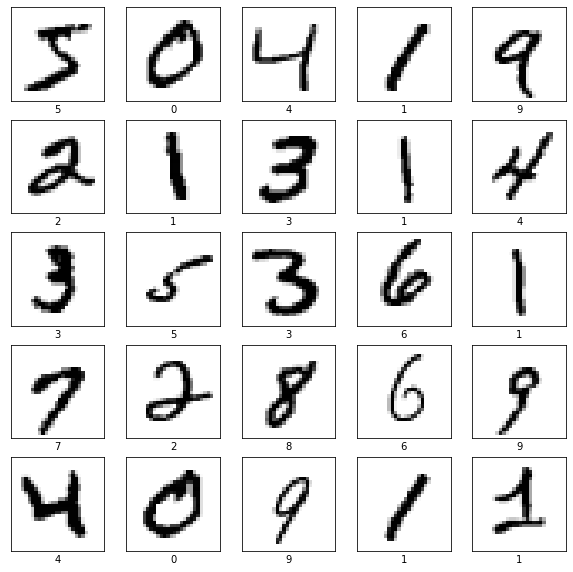

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Create the layers

Neural networks are made up of layers. Here, you'll define the layers, and assemble them into a model. We will start with a single Dense layer. 



In [5]:
# A linear model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, tf.keras.layers.Flatten , transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data. This is necessary since Dense layers require arrays as input.

After the pixels are flattened, this model consists of a single Dense layer. This is a densely connected, or fully connected, neural layer. The Dense layer has 10 neurons with softmax activation. This returns an array of 10 **probability** scores that **sum to 1**. 

After classifying an image, each neuron will contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

*Loss function* — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

*Optimizer* — This is how the model is updated based on the data it sees and its loss function.

*Metrics* — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the ```train_images``` and ```train_labels``` arrays.

1. The model learns to associate images and labels.

1. You ask the model to make predictions about a test set—in this example, the ```test_images``` array.

1. Verify that the predictions match the labels from the ```test_labels``` array.

To begin training, call the ```model.fit``` method — so called because it "fits" the model to the training data:

In [7]:
EPOCHS=10
model.fit(train_images, train_labels, epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4280 - accuracy: 0.8779
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1181 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0419 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0307 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0260 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0190 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.013

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.90 (or 90%) on the training data. Accuracy may be slightly different each time you run this code, since the parameters inside the Dense layer are randomly initialized.

## Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9771

Test accuracy: 0.9771000146865845


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data. An overfitted model "memorizes" the training data—with less accuracy on testing data. 

## Make predictions
With the model trained, you can use it to make predictions about some images.

In [9]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [10]:
print(predictions[0])

[4.0456324e-10 3.4460410e-10 1.1057941e-06 5.1479461e-04 1.3278412e-12
 3.3061920e-09 4.2969283e-14 9.9948406e-01 9.4354196e-09 7.1281132e-09]


A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 digits. You can see which label has the highest confidence value:

In [11]:
print(tf.argmax(predictions[0]))

tf.Tensor(7, shape=(), dtype=int64)


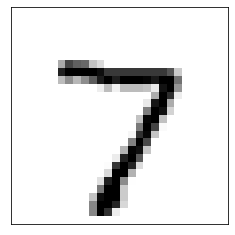

In [12]:
plt.xticks([])
plt.yticks([])
plt.imshow(test_images[0], cmap=plt.cm.binary)